In [2]:
#Before start specify root dir with file android_traffic.csv and folder gi4e_database 
from google.colab import drive
drive.mount('/content/drive')
root_dir = '/content/drive/MyDrive/'

Mounted at /content/drive


# Task 3: Practical Tasks on Ensemble Learning

### Read data

First of all we read dataset and split itinto train and test

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv(root_dir+'android_traffic.csv')

x,y = data.loc[:,:'dns_query_times'],data['type']
y = (y=='benign')*1
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify = y)


### Create models

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
random_forest = RandomForestClassifier(max_depth = 15)
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))
boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))

### Tune

In [8]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : np.arange(1,10),'base_estimator__max_features' : np.arange(1,11), 'base_estimator__min_impurity_decrease' : np.arange(0,0.15,0.01)}
param_grid_for_rf = {'n_estimators' : np.arange(1,10),'max_features' : np.arange(1,11), 'min_impurity_decrease' : np.arange(0,0.15,0.01)}

grid_search_rf = GridSearchCV(
        random_forest, param_grid_for_rf,cv = 7)
grid_search_bagging = GridSearchCV(
        bagging, param_grid,cv = 7)
grid_search_boosting = GridSearchCV(
        boosting, param_grid,cv = 7)


grid_search_rf.fit(x_train, y_train)
param1_rf = grid_search_rf.best_params_
print(f"Parameters for random forest {grid_search_rf.best_params_}")

grid_search_bagging.fit(x_train, y_train)
param1_b = grid_search_bagging.best_params_
print(f"Parameters for bagging{grid_search_bagging.best_params_}")

grid_search_boosting.fit(x_train, y_train)
param1_boosting = grid_search_boosting.best_params_
print(f"Parameters for boosting{grid_search_boosting.best_params_}")


Parameters for random forest {'max_features': 3, 'min_impurity_decrease': 0.0, 'n_estimators': 9}
Parameters for bagging{'base_estimator__max_features': 5, 'base_estimator__min_impurity_decrease': 0.0, 'n_estimators': 9}
Parameters for boosting{'base_estimator__max_features': 8, 'base_estimator__min_impurity_decrease': 0.0, 'n_estimators': 8}


So our best parameters are:

Parameters for random forest {'max_features': 3, 'min_impurity_decrease': 0.0, 'n_estimators': 9}

Parameters for bagging {'base_estimator__max_features': 5, 'base_estimator__min_impurity_decrease': 0.0, 'n_estimators': 9}

Parameters for boosting {'base_estimator__max_features': 8, 'base_estimator__min_impurity_decrease': 0.0, 'n_estimators': 8}

In [9]:
param1_rf = {'max_features': 3, 'min_impurity_decrease': 0.0, 'n_estimators': 9}
param1_b = {'base_estimator__max_features': 5, 'base_estimator__min_impurity_decrease': 0.0, 'n_estimators': 9}
param1_boosting = {'base_estimator__max_features': 8, 'base_estimator__min_impurity_decrease': 0.0, 'n_estimators': 8}

In [10]:
random_forest = RandomForestClassifier(max_depth = 15,n_estimators = grid_search_rf.best_params_['n_estimators'],
                                       max_features = grid_search_rf.best_params_['max_features'],
                                       min_impurity_decrease = grid_search_rf.best_params_['min_impurity_decrease'])

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,max_features =  grid_search_bagging.best_params_['base_estimator__max_features'],
                                                                  min_impurity_decrease = grid_search_bagging.best_params_['base_estimator__min_impurity_decrease']),
                            n_estimators = grid_search_bagging.best_params_['n_estimators'])

boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                                    max_features =  grid_search_boosting.best_params_['base_estimator__max_features'],
                                                                    min_impurity_decrease = grid_search_boosting.best_params_['base_estimator__min_impurity_decrease']),
                             n_estimators = grid_search_boosting.best_params_['n_estimators'])


In [11]:
from sklearn.metrics import accuracy_score

random_forest.fit(x_train,y_train)
y_pred1 = random_forest.predict(x_test)
print(f"Accuracy rand. forest {accuracy_score(y_test, y_pred1)}")

bagging.fit(x_train,y_train)
y_pred2 = bagging.predict(x_test)
print(f"Accuracy bagging {accuracy_score(y_test, y_pred2)}")

boosting.fit(x_train,y_train)
y_pred3 = boosting.predict(x_test)
print(f"Accuracy boosting {accuracy_score(y_test, y_pred3)}")



Accuracy rand. forest 0.8910133843212237
Accuracy bagging 0.8935627788400254
Accuracy boosting 0.9031230082855322


**Question**: Which model performed the best on the test set? Why do you think that is the case?

Accuracy rand. forest 0.8910133843212237

Accuracy bagging 0.8935627788400254

Accuracy boosting 0.9031230082855322

Finaly, **boosting** perform beter in this case, as it depends on number of estimators more.

**Question**: Answer this question before doing the next part. If you fine-tuned the hyper-parameter max depth as
well, which of the three ensemble models would you expect to have deeper (larger max depth value)
base learners and which would have shallower base learners? Why do you think that would be the
case?

After tuning **max_depth** Bagging base learners will have deaper trees as the objection of this algorithm is take hard learned models and make it weak. The hard models will have deaper trees. Boosting algorithm will have low depth of base trees as it requier weak models to train better models.

### Initialize, tune new model and draw graph

#### Initialize and tune model

In [20]:

random_forest = RandomForestClassifier(max_depth = 15,n_estimators = param1_rf['n_estimators'],
                                       max_features = param1_rf['max_features'],
                                       min_impurity_decrease = param1_rf['min_impurity_decrease'])

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,max_features =  param1_b['base_estimator__max_features'],
                                                                  min_impurity_decrease = param1_b['base_estimator__min_impurity_decrease']),
                            n_estimators = param1_b['n_estimators'])

boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                                    max_features =  param1_boosting['base_estimator__max_features'],
                                                                    min_impurity_decrease = param1_boosting['base_estimator__min_impurity_decrease']),
                             n_estimators = param1_boosting['n_estimators'])

param_grid = {'max_depth' : np.arange(4,26)}

grid_search_rf = GridSearchCV(
        random_forest, param_grid,cv = 7)

param_grid = {'base_estimator__max_depth' : np.arange(4,26)}
grid_search_bagging = GridSearchCV(
        bagging, param_grid,cv = 7)
grid_search_boosting = GridSearchCV(
        boosting, param_grid,cv = 7)

grid_search_rf.fit(x_train, y_train)
print(f"Parameters for random forest {grid_search_rf.best_params_}")

grid_search_bagging.fit(x_train, y_train)
print(f"Parameters for bagging{grid_search_bagging.best_params_}")

grid_search_boosting.fit(x_train, y_train)
print(f"Parameters for boosting{grid_search_boosting.best_params_}")

Parameters for random forest {'max_depth': 24}
Parameters for bagging{'base_estimator__max_depth': 20}
Parameters for boosting{'base_estimator__max_depth': 17}


#### Draw

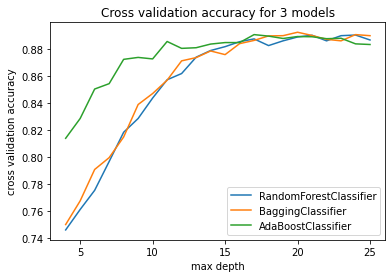

In [27]:
import matplotlib.pylab as plt
%matplotlib inline
depth = np.arange(4,26)

plt.title('Cross validation accuracy for 3 models')
plt.xlabel('max depth')
plt.ylabel('cross validation accuracy')

plt.plot(depth, grid_search_rf.cv_results_['mean_test_score'])
plt.plot(depth, grid_search_bagging.cv_results_['mean_test_score'])
plt.plot(depth, grid_search_boosting.cv_results_['mean_test_score'])
plt.legend(['RandomForestClassifier', 'BaggingClassifier','AdaBoostClassifier'])
plt.show()

**Question** Do the results agree with your answer in the previous part?

As result bagging show the better result on tuning parameter max_depth

# Task: 4 Practical Tasks on CNN

### Part 1

#### Preprocess and visualize the dataset

#### Read all images, convert them to gray with and read readme

In [29]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage
import pandas as pd

In [31]:
def read_image_label(file_name):
        label = []
        with open(file_name,'r') as f:
            for line in f.readlines():
                line = line.split('\t',13)
                line = line[:13]
                
                points_l = []
                points_r = []
                for i in range(1,(len(line)-1)//2,2):
                    points_l.append([float(line[i]),float(line[i+1])])
                    points_r.append([float(line[i+6]),float(line[i+1+6])])
                #swap points for left eye
                swap = points_r[0]
                points_r[0] = points_r[2]
                points_r[2] = swap
                swap = points_l[0]
                points_l[0] = points_l[2]
                points_l[2] = swap
                label.append({"name": line[0],"points": points_l})
                label.append({"name": line[0],"points": points_r})
        return label



data = []
labels = read_image_label(root_dir+'gi4e_database/labels/image_labels.txt')
for elem in labels:
    image_name,points = elem["name"],elem["points"]
    image = cv2.imread(f'{root_dir}gi4e_database/images/{image_name}')
    image = cv2.cvtColor(image ,cv2.cv2.COLOR_RGB2GRAY)

    data.append({"image":image,"x":None,"y":None,"points":points})


#### Show one of images

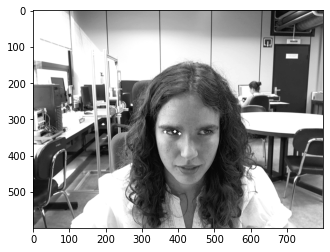

In [32]:
image = np.copy(data[3]["image"])
points = data[3]["points"]
#x,y = points[0][0],points[0][1]
for p in points:
    image = cv2.circle(image,(int(p[0]),int(p[1])),2,(255,0,0),3)
plt.imshow(image, cmap='gray')

#### Crop image and create y image

In [33]:
def process_image(image,points):
        p = points[0]
        p_c = points[1]

        
        p_x = [int(p[0]),int(p_c[0]-p[0])]
        p_y = [int(p[1]),int(p_c[1]-p[1]+24)]
        
        return image[p_y[0]-24:p_y[0]+24,p_x[0]:p_x[0]+48],[p_x[1],p_y[1]]
    
def create_image(center):
    p_x,p_y = center[0],center[1]
    y = np.zeros((48,48))
    for i in [1,-1,0]:
        for j in [1,-1,0]:
            y[p_x+i,p_y+j] = 1
    return y

for i in range(len(data)):
    data[i]["image"],data[i]["points"] = process_image(data[i]["image"],data[i]["points"])
    data[i]["y"] = create_image(data[i]["points"])

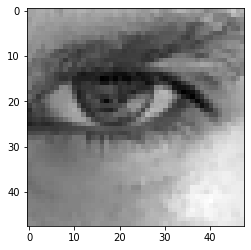

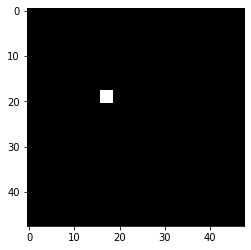

In [34]:
plt.imshow(data[4]["image"], cmap='gray')
plt.show()
plt.imshow(data[4]["y"], cmap='gray')
plt.show()

#### Normalize

In [35]:
for i in range(len(data)):
    data[i]["x"] = np.copy(data[i]["image"])/255

#### Split dataset

In [36]:
def train_test_split():
    np.random.seed(0)
    train_idx = np.random.choice(2472,int(2472*0.8),replace=False)
    test_idx = np.arange(0,2472)
    test_idx[train_idx] = -1
    test_idx = test_idx[test_idx != -1]
    return train_idx,test_idx
train,test = train_test_split()
x_train,y_train = [],[]
for idx in train:
    elem = data[idx]
    x_train.append(elem["x"])
    y_train.append(elem["y"])

x_test,y_test = [],[]
for elem in test:
    elem = data[idx]
    x_test.append(elem["x"])
    y_test.append(elem["y"])


### Part 2

#### Dataset class

In [37]:
from torch.utils.data import Dataset
class EyesDataset(Dataset):

    def __init__(self, x_train,y_train,x_test,y_test,train,transform):
        if train == True:
            self.x = x_train
            self.y = y_train
        else:
            self.x = x_test
            self.y = y_test
        self.transform = transform

    def __len__(self):
        #print(self.x[0])
        return len(self.x)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        image = self.x[idx]
        label = self.y[idx]
        if self.transform:
            image = self.transform(image)
            label = self.transform(label)
        
        #print(type(image))
        #image = image.double
        #print(type(image))
        
        '''with open("output.txt","a") as f:
            torch.set_printoptions(profile="full")
            f.write(str(image))
            torch.set_printoptions(profile="full")
            f.write(str(label))'''
        return image,label

#### Load data

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch. utils.data import DataLoader
from torch.utils.data import Dataset

batch_size = 32
test_batch_size = 10


# Transformations
data_transformations = transforms.ToTensor()

# Data Source
train = EyesDataset(x_train,y_train,x_test,y_test,train=True,transform=data_transformations)
test = EyesDataset(x_train,y_train,x_test,y_test,train=False,transform=data_transformations)


# Data loaders
train_loader = DataLoader(train,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test,
                         batch_size=test_batch_size, shuffle=True)

#### Model

In [39]:
class Net(nn.Module):
    # Convolution formula: ((n + 2p - f) / s) + 1
        
    def __init__(self,act):
        
        super(Net, self).__init__()
        self.activator = act

        self.conv1 = nn.Conv2d(1, 64, kernel_size=3,padding = 1) 
        self.batch_norm1 = nn.BatchNorm2d(64, affine=False)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=5,padding = 2)
        self.batch_norm2 = nn.BatchNorm2d(128, affine=False)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3,padding = 1)
        self.batch_norm3 = nn.BatchNorm2d(256, affine=False)

        self.conv4 = nn.ConvTranspose2d(256, 64, kernel_size=4,stride = 4)
        self.batch_norm4 = nn.BatchNorm2d(64, affine=False)
        self.conv5 = nn.ConvTranspose2d(128, 64, kernel_size=1)
        self.batch_norm5 = nn.BatchNorm2d(64, affine=False)
        self.conv6 = nn.ConvTranspose2d(64, 1, kernel_size=1)
        self.batch_norm6 = nn.BatchNorm2d(1, affine=False)
        

        
        self.chain_2_conv1 = nn.Conv2d(256, 256, kernel_size=3,padding = 1) 
        self.chain_2_batch_norm1 = nn.BatchNorm2d(256, affine=False)
        self.chain_2_conv2 = nn.ConvTranspose2d(256, 128,kernel_size=2,stride=2)
        self.chain_2_batch_norm2 = nn.BatchNorm2d(128, affine=False)

        self.chain_2_conv3 = nn.ConvTranspose2d(128, 64,  kernel_size=2,stride=2)
        self.chain_2_batch_norm3 = nn.BatchNorm2d(64, affine=False)
        self.chain_2_conv4 = nn.ConvTranspose2d(64, 1, kernel_size=1)
        self.chain_2_batch_norm4 = nn.BatchNorm2d(1, affine=False)
        

    def forward(self, x):
        # Exercise: calclulate shape after each layer

        # initial shape: [32, 1, 48, 48]
        x = self.batch_norm1(self.activator((self.conv1(x))))
        skip_x = x
        # shape: [32, 64,48,48]
        x = self.batch_norm2(self.activator(F.max_pool2d(self.conv2(x),2)))
        # shape: [32, 128,24,24]
        
        x = self.batch_norm3(self.activator(F.max_pool2d(self.conv3(x),2)))
        # shape: [32, 256,12,12]
        eye = x
        x = self.batch_norm4(self.activator(self.conv4(x)))
        
        x = torch.cat((x,skip_x), 1)
        # shape: [32, 64,48,48] + [32, 64,48,48]
        
        x = self.batch_norm5(self.activator(self.conv5(x)))
        # shape: [32, 64,48,48]
        
        x = self.batch_norm6(self.activator(self.conv6(x)))
        # shape: [32, 1,48,48]

        #Generate eye
        eye = self.chain_2_batch_norm1(self.activator(self.chain_2_conv1(eye)))
        
        eye = self.chain_2_batch_norm2(self.activator(self.chain_2_conv2(eye)))
        eye = self.chain_2_batch_norm3(self.activator(self.chain_2_conv3(eye)))
        eye = self.chain_2_batch_norm4(self.activator(self.chain_2_conv4(eye)))
        
        return x,eye

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [40]:
def train( model, device, train_loader, optimizer,loss_function,activations, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output,eye_output = model(data)
        loss = loss_function(output, target)+loss_function(eye_output, data)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))
            
def test( model, device,loss_function,activations, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    i = 0
    res = []
    res_e = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output,eye_output = model(data)
            res.append(output)
            res_e.append(eye_output)
            test_loss += loss_function(output, target).item()+loss_function(eye_output, data).item()
            #pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            
            correct += output.eq(target.view_as(output)).all().item()
            correct += output.eq(data.view_as(output)).all().item()
    test_loss = test_loss/(len(test_loader)*2)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset)*2,
        100. * correct / len(test_loader.dataset))*2)
    return res,res_e

#### Fit model with relu activator and mse loss function

In [31]:

epochs = 50
lr = 0.01
momentum = 0.5
log_interval = 20

# training CNN model


loss_function = F.mse_loss #[F.mse_loss,F.l1_loss]
activations = F.relu        #[F.relu, F.sigmoid, F.tanh]

model_cnn = Net(activations).to(device).double()
model = model_cnn
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

res_1 = None
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer,loss_function,activations, epoch)
    res_1,res_e_1 = test(model, device,loss_function,activations, test_loader)

torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [0/1977 (0%)]	Loss: 2.123735
Train Epoch: 1 [640/1977 (32%)]	Loss: 1.888411
Train Epoch: 1 [1280/1977 (65%)]	Loss: 1.808766
Train Epoch: 1 [1920/1977 (97%)]	Loss: 1.832547

Test set: Average loss: 0.7333, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.7333, Accuracy: 0/990 (0.00%)

Train Epoch: 2 [0/1977 (0%)]	Loss: 1.845114
Train Epoch: 2 [640/1977 (32%)]	Loss: 1.829798
Train Epoch: 2 [1280/1977 (65%)]	Loss: 1.810637
Train Epoch: 2 [1920/1977 (97%)]	Loss: 1.855346

Test set: Average loss: 0.7091, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.7091, Accuracy: 0/990 (0.00%)

Train Epoch: 3 [0/1977 (0%)]	Loss: 1.816197
Train Epoch: 3 [640/1977 (32%)]	Loss: 1.834532
Train Epoch: 3 [1280/1977 (65%)]	Loss: 1.805854
Train Epoch: 3 [1920/1977 (97%)]	Loss: 1.832116

Test set: Average loss: 0.6045, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.6045, Accuracy: 0/990 (0.00%)

Train Epoch: 4 [0/1977 (0%)]	Loss: 1.834478
Train Epoch: 4 [640/1977 (32%)]	Loss: 1.874240
Tra

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


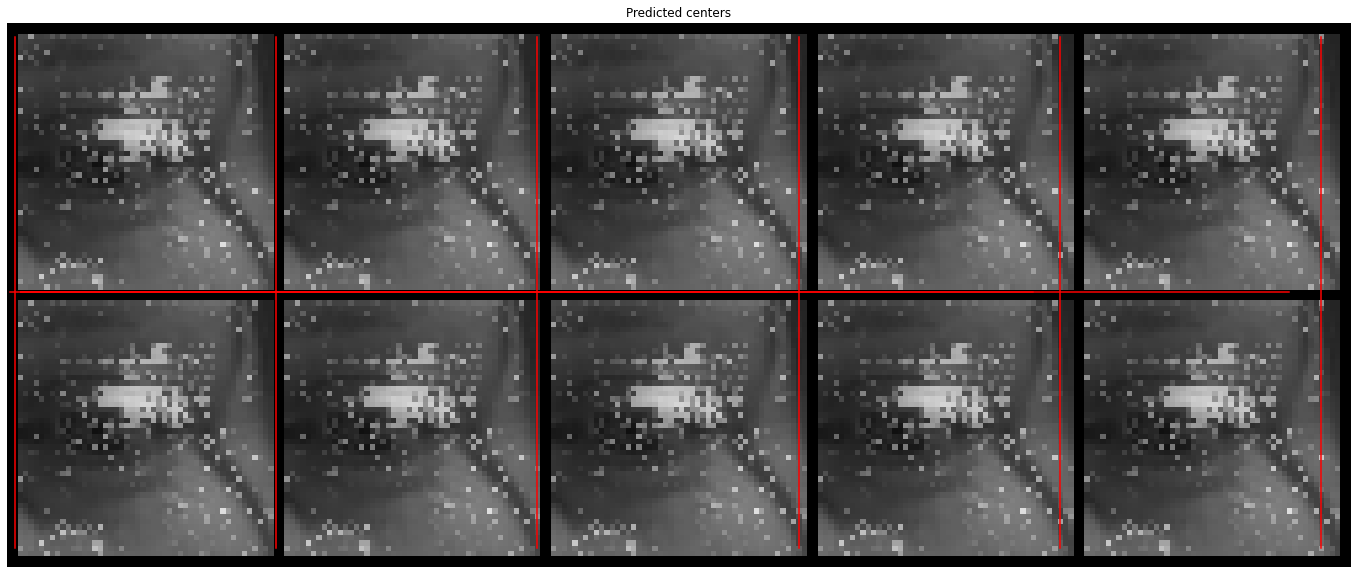

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


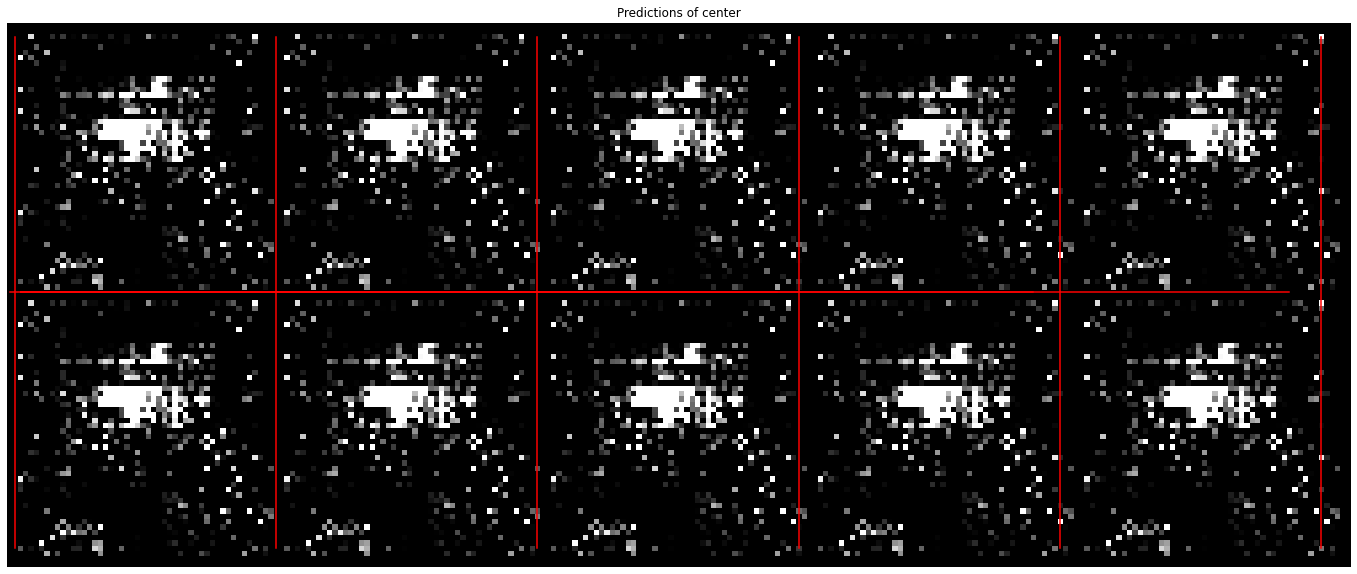

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


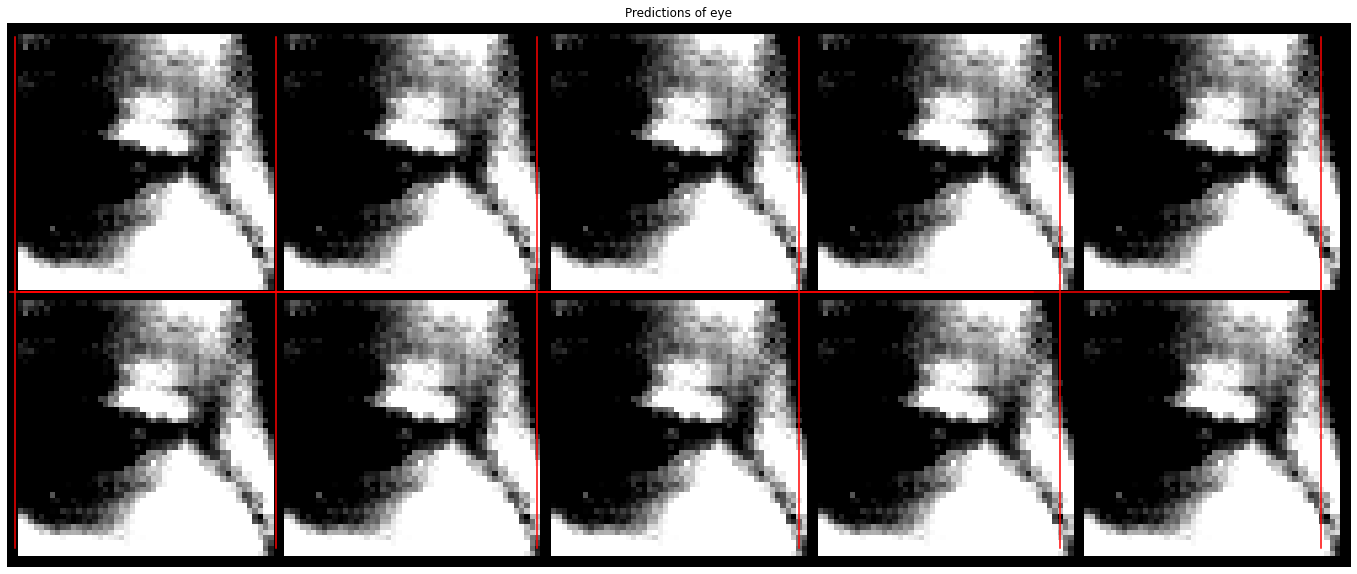

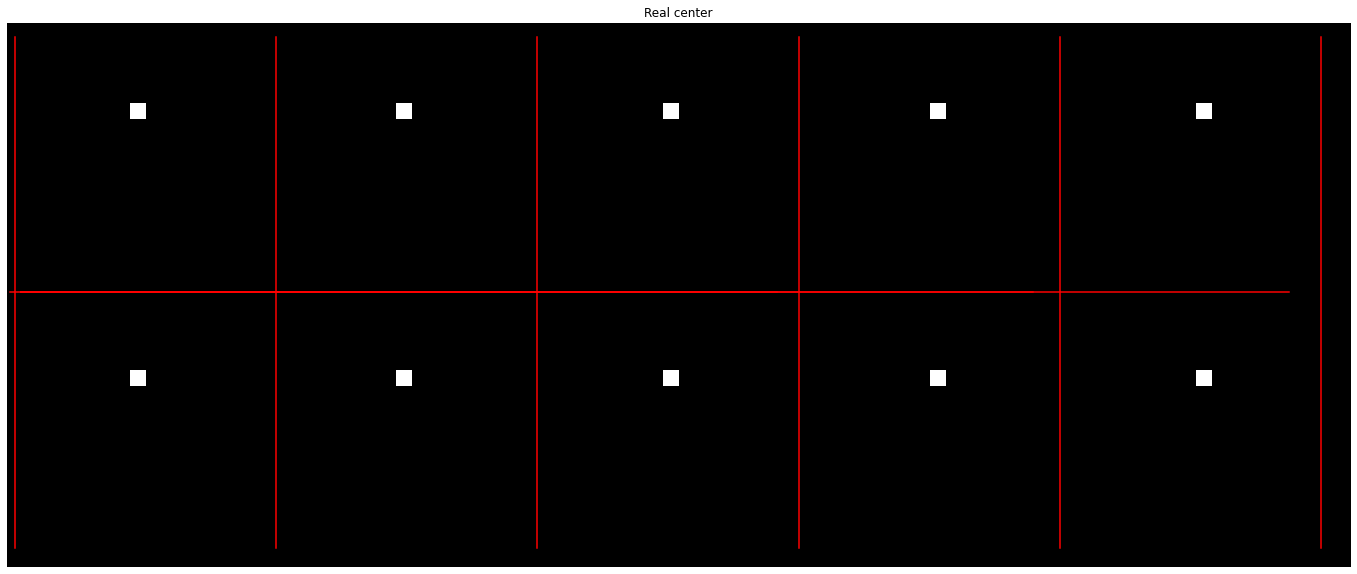

In [45]:
# Draw results
import torchvision.utils as utils 
def plot_pred_eye(sample_batched):
        grid = utils.make_grid(sample_batched,nrow = 5)
        grid = grid.to(torch.device("cpu"))
        plt.imshow((grid.numpy()).transpose((1,2, 0)))
        batch_size = 10
        
        for i in range(batch_size-1-3):
                
                plt.plot([i * 48 + (i + 1),i * 48 + (i + 1)],
                        [2,2+48*2], "r")
                
                plt.plot([2,48*i],
                        [2+48,2+48], "r")
        plt.axis('off')
        plt.ioff()




def plot_pred_center(eye_batched,sample_batched):
                
        batch_size = 10
        im_size = 48
        grid_border_size = 2

        grid = utils.make_grid(eye_batched,nrow=5)
        plt.imshow(grid.numpy().transpose((1, 2, 0)))

        grid2 = utils.make_grid(sample_batched,nrow = 5)
        grid2 = grid2.to(torch.device("cpu"))
        plt.imshow((grid2.numpy()).transpose((1,2, 0)),alpha = 0.4)

        for i in range(batch_size-4):
                plt.plot([i * 48 + (i + 1),i * 48 + (i + 1)],
                        [2,2+48*2], "r")
                
                plt.plot([2,48*i], [2+48,2+48], "r")

def plot_res(sample_batched,idx):
        landmarks_batch = \
                sample_batched[idx]
        batch_size = 10
        im_size = 48
        grid_border_size = 2

        grid = utils.make_grid(landmarks_batch,nrow=5)
        plt.imshow(grid.numpy().transpose((1, 2, 0)))

        for i in range(batch_size-4):
                plt.plot([i * 48 + (i + 1),i * 48 + (i + 1)],
                        [2,2+48*2], "r")
                
                plt.plot([2,48*i], [2+48,2+48], "r")
        
batch = next(iter(test_loader))
plt.figure(figsize = [100,10])
plot_pred_center(batch[0],res_1[0])
plt.axis('off')
plt.title("Predicted centers")
plt.ioff()
plt.show()

plt.figure(figsize = [100,10])
plot_pred_eye(res_1[0])
plt.axis('off')
plt.title("Predictions of center")
plt.ioff()
plt.show()


plt.figure(figsize = [100,10])
plot_pred_eye(res_e_1[0])
plt.axis('off')
plt.title("Predictions of eye")
plt.ioff()
plt.show()


plt.figure(figsize = [100,10])
plot_res(batch,1)
plt.title("Real center")
plt.axis('off')
plt.ioff()
plt.show()



#### Fit model with sigmoid activator and l1 loss function

In [33]:

epochs = 50
lr = 0.01
momentum = 0.5
log_interval = 100

loss_function = F.l1_loss      #[F.mse_loss,F.l1_loss]
activations = F.sigmoid        #[F.relu, F.sigmoid, F.tanh]

model_cnn = Net(activations).to(device).double()
model = model_cnn
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

res_2 = None
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer,loss_function,activations, epoch)
    res_2,res_e_2 = test(model, device,loss_function,activations, test_loader)

torch.save(model.state_dict(), "mnist_cnn.pt")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/1977 (0%)]	Loss: 1.869537

Test set: Average loss: 0.5348, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.5348, Accuracy: 0/990 (0.00%)

Train Epoch: 2 [0/1977 (0%)]	Loss: 1.477536

Test set: Average loss: 0.5821, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.5821, Accuracy: 0/990 (0.00%)

Train Epoch: 3 [0/1977 (0%)]	Loss: 1.444905

Test set: Average loss: 0.4868, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.4868, Accuracy: 0/990 (0.00%)

Train Epoch: 4 [0/1977 (0%)]	Loss: 1.244086

Test set: Average loss: 0.4082, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.4082, Accuracy: 0/990 (0.00%)

Train Epoch: 5 [0/1977 (0%)]	Loss: 1.134341

Test set: Average loss: 0.6959, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.6959, Accuracy: 0/990 (0.00%)

Train Epoch: 6 [0/1977 (0%)]	Loss: 1.306315

Test set: Average loss: 0.3730, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.3730, Accuracy: 0/990 (0.00%)

Train Epoch: 7 [0/1977 (0%)]	Loss: 0.922304

T

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


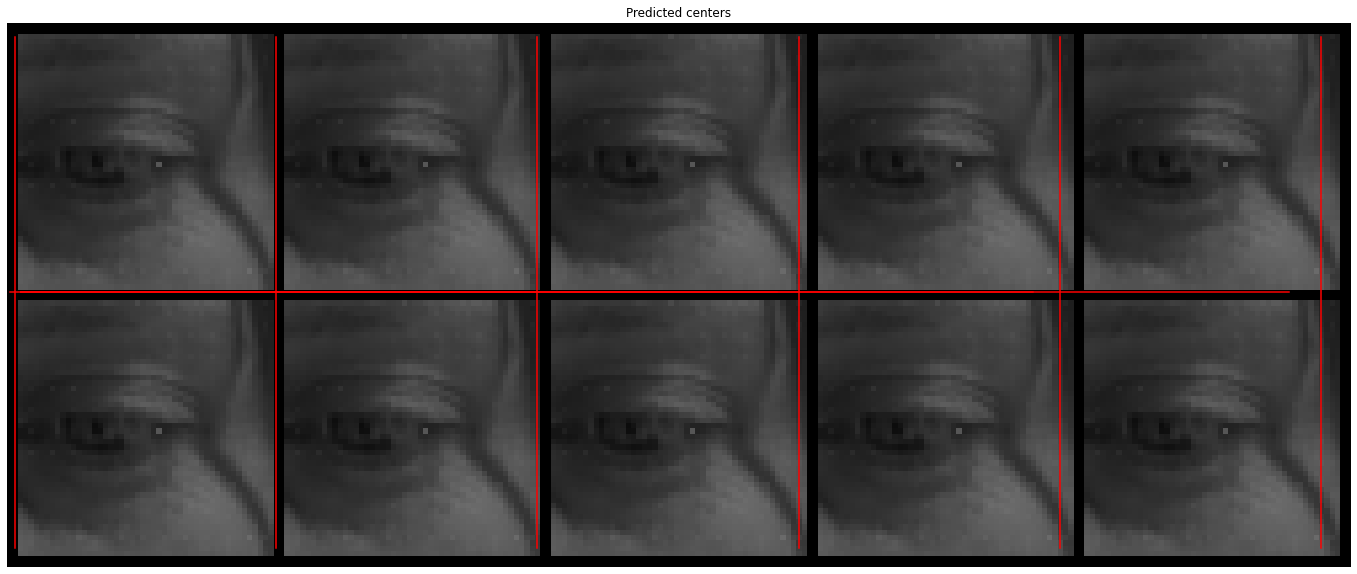

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


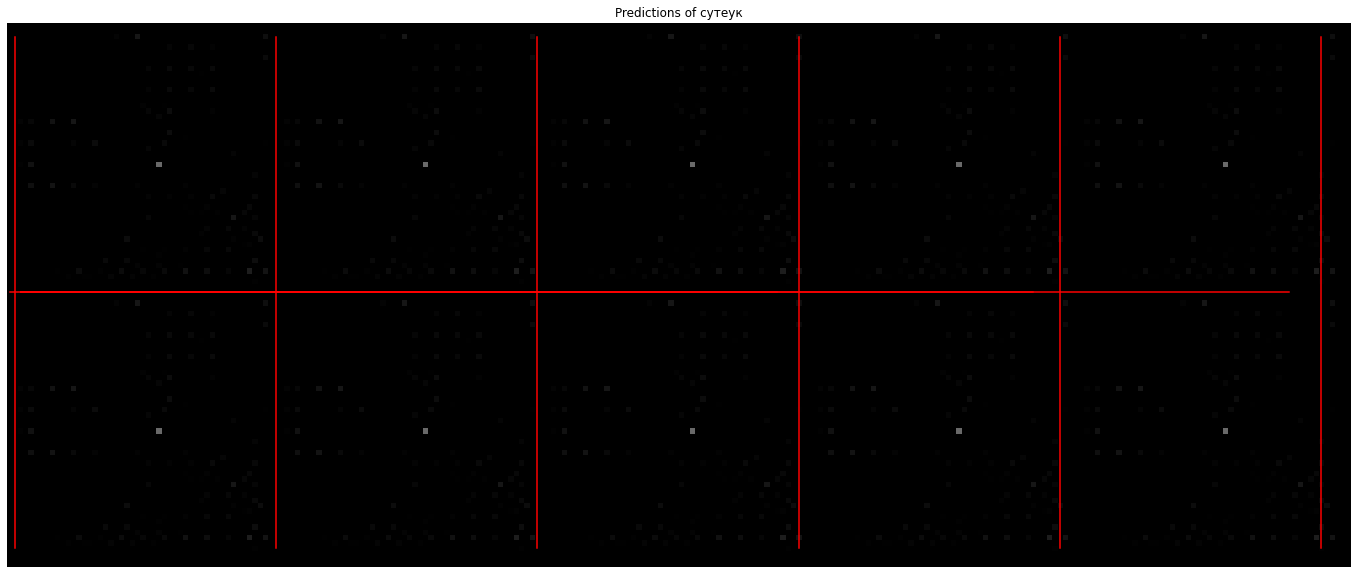

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


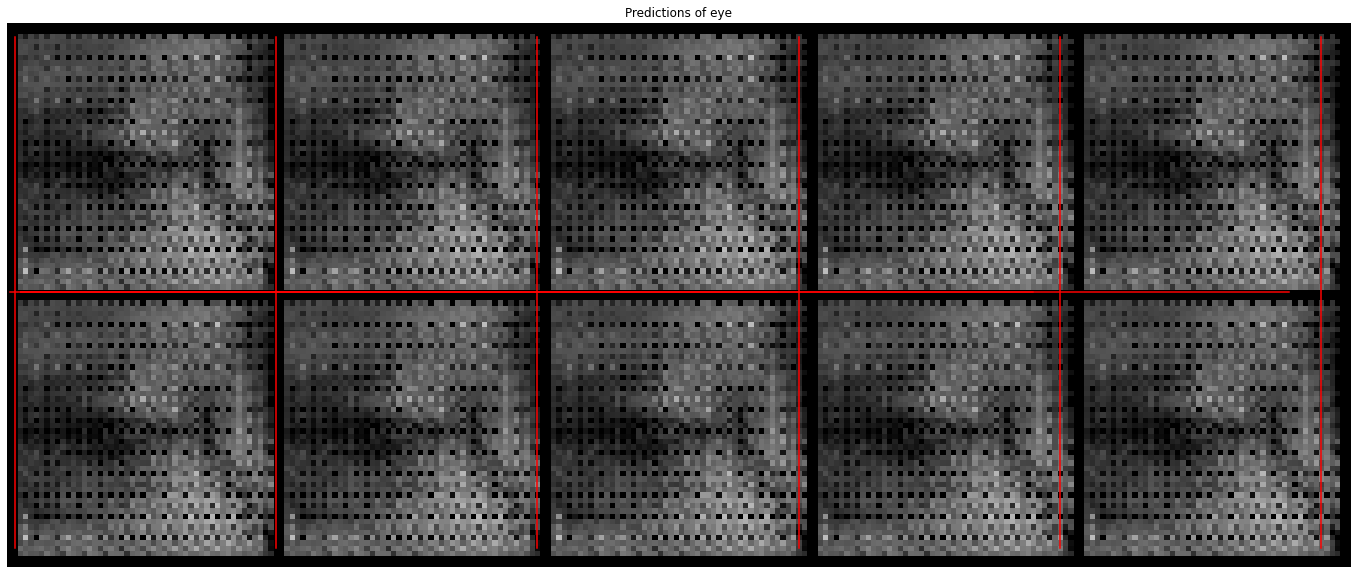

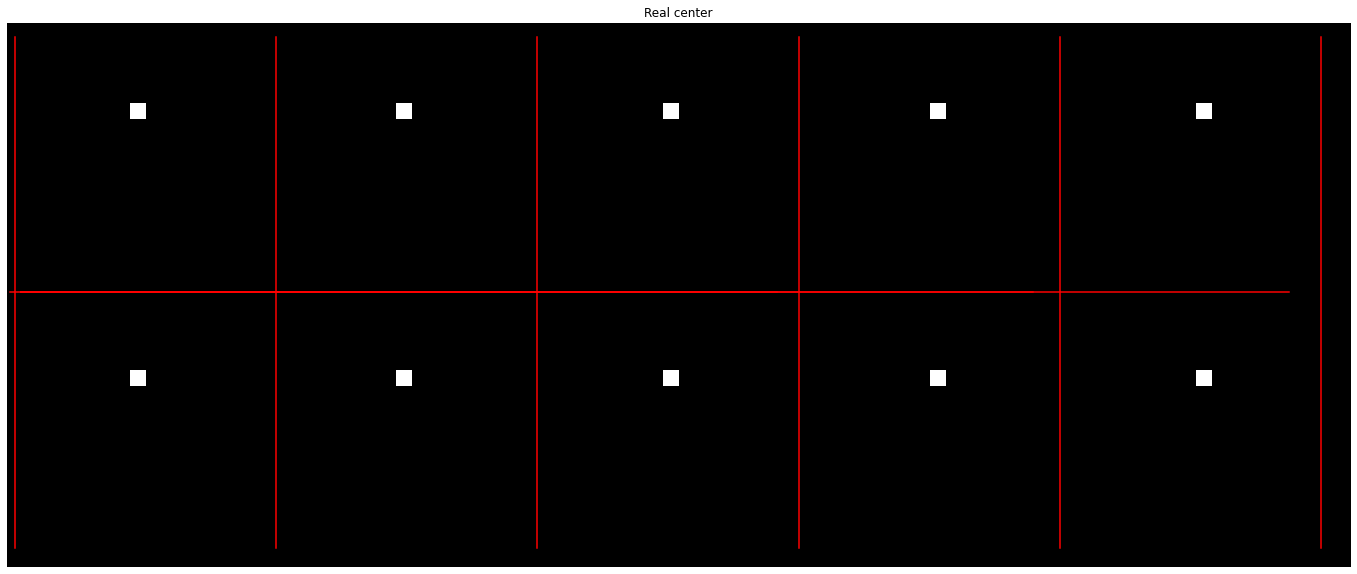

In [43]:
plt.figure(figsize = [100,10])
plot_pred_center(batch[0],res_2[0])
plt.axis('off')
plt.title("Predicted centers")
plt.ioff()
plt.show()

plt.figure(figsize = [100,10])
plot_pred_eye(res_2[0])
plt.axis('off')
plt.title("Predictions of center")
plt.ioff()
plt.show()



plt.figure(figsize = [100,10])
plot_pred_eye(res_e_2[0])
plt.axis('off')
plt.title("Predictions of eye")
plt.ioff()
plt.show()


plt.figure(figsize = [100,10])
plot_res(batch,1)
plt.title("Real center")
plt.axis('off')
plt.ioff()
plt.show()

#### Fit model with relu activator and mse loss function

In [41]:

epochs = 100
lr = 0.01
momentum = 0.5
log_interval = 20

# training CNN model


loss_function = F.mse_loss #[F.mse_loss,F.l1_loss]
activations = F.relu        #[F.relu, F.sigmoid, F.tanh]

model_cnn = Net(activations).to(device).double()
model = model_cnn
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

res_1 = None
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer,loss_function,activations, epoch)
    res_1,res_e_1 = test(model, device,loss_function,activations, test_loader)

torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [0/1977 (0%)]	Loss: 2.208048
Train Epoch: 1 [640/1977 (32%)]	Loss: 1.866824
Train Epoch: 1 [1280/1977 (65%)]	Loss: 1.844989
Train Epoch: 1 [1920/1977 (97%)]	Loss: 1.863161

Test set: Average loss: 0.4157, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.4157, Accuracy: 0/990 (0.00%)

Train Epoch: 2 [0/1977 (0%)]	Loss: 1.848953
Train Epoch: 2 [640/1977 (32%)]	Loss: 1.857018
Train Epoch: 2 [1280/1977 (65%)]	Loss: 1.832928
Train Epoch: 2 [1920/1977 (97%)]	Loss: 1.858831

Test set: Average loss: 0.5126, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.5126, Accuracy: 0/990 (0.00%)

Train Epoch: 3 [0/1977 (0%)]	Loss: 1.829135
Train Epoch: 3 [640/1977 (32%)]	Loss: 1.826833
Train Epoch: 3 [1280/1977 (65%)]	Loss: 1.836875
Train Epoch: 3 [1920/1977 (97%)]	Loss: 1.868707

Test set: Average loss: 0.4607, Accuracy: 0/990 (0.00%)

Test set: Average loss: 0.4607, Accuracy: 0/990 (0.00%)

Train Epoch: 4 [0/1977 (0%)]	Loss: 1.834133
Train Epoch: 4 [640/1977 (32%)]	Loss: 1.819520
Tra

KeyboardInterrupt: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


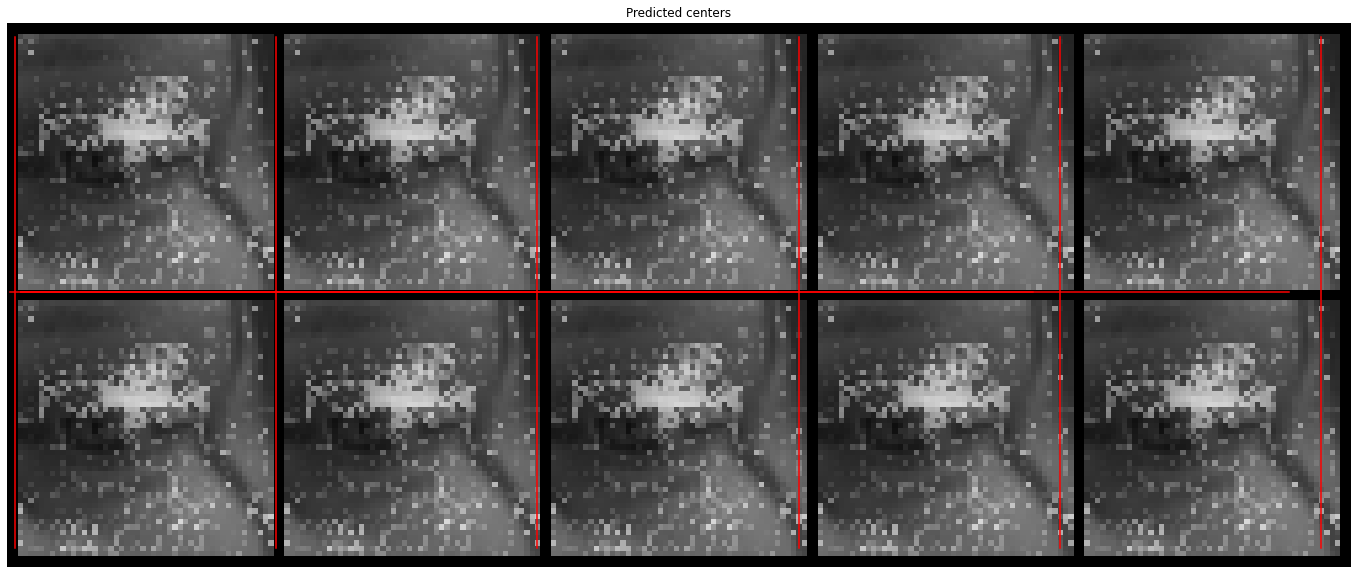

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


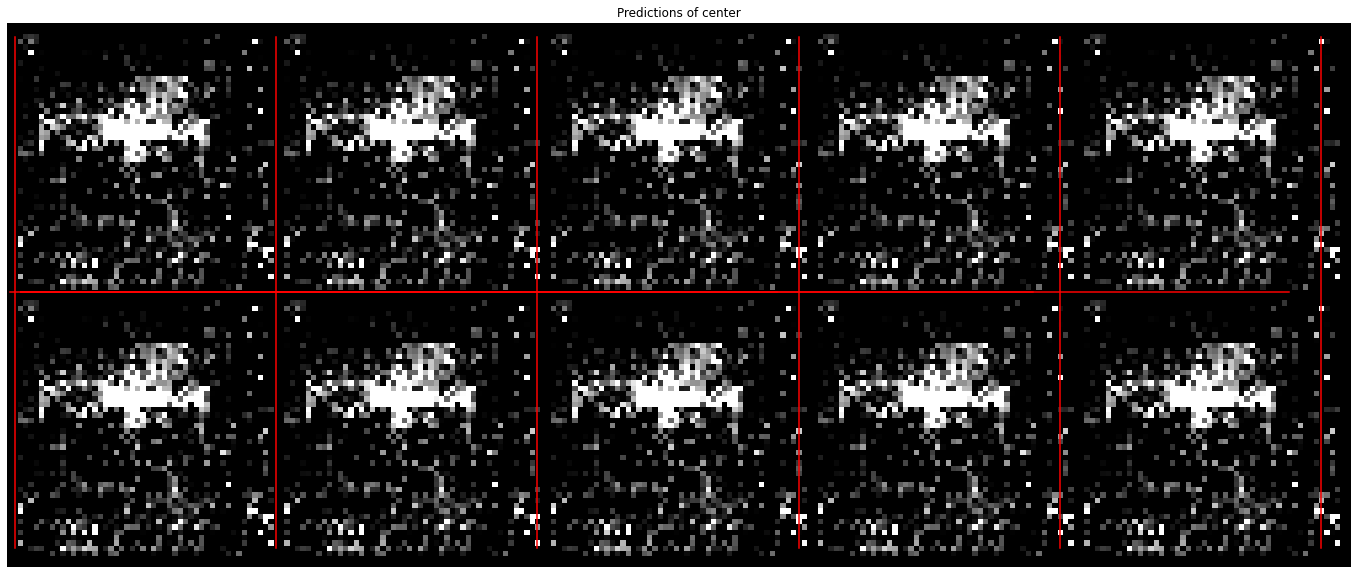

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


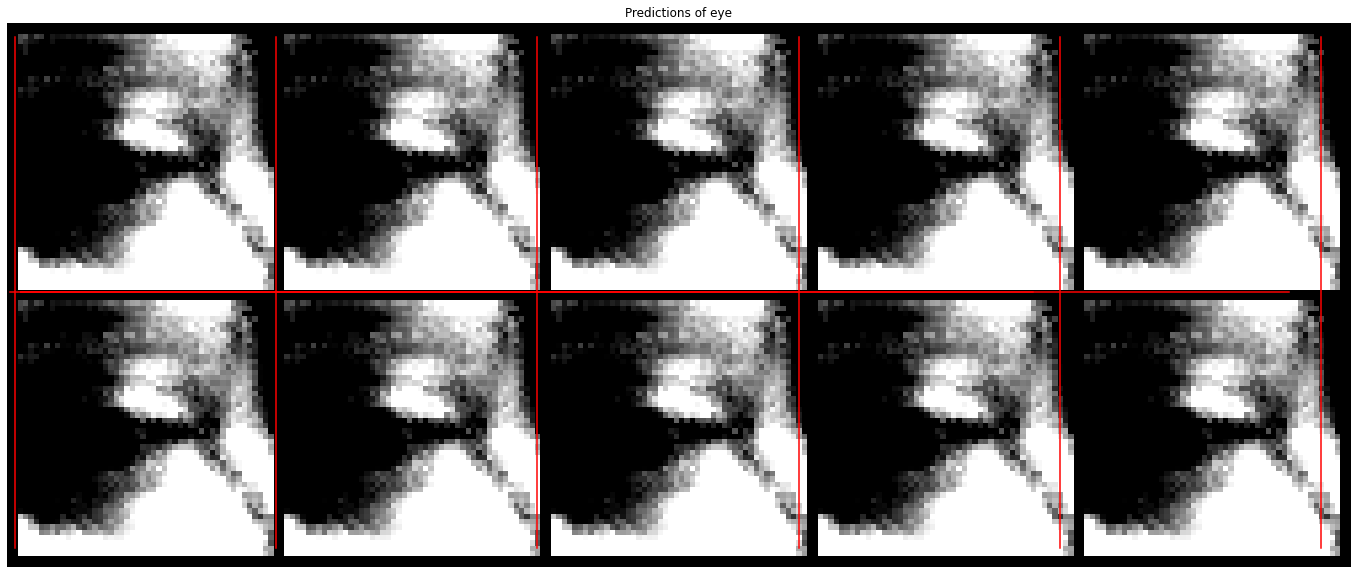

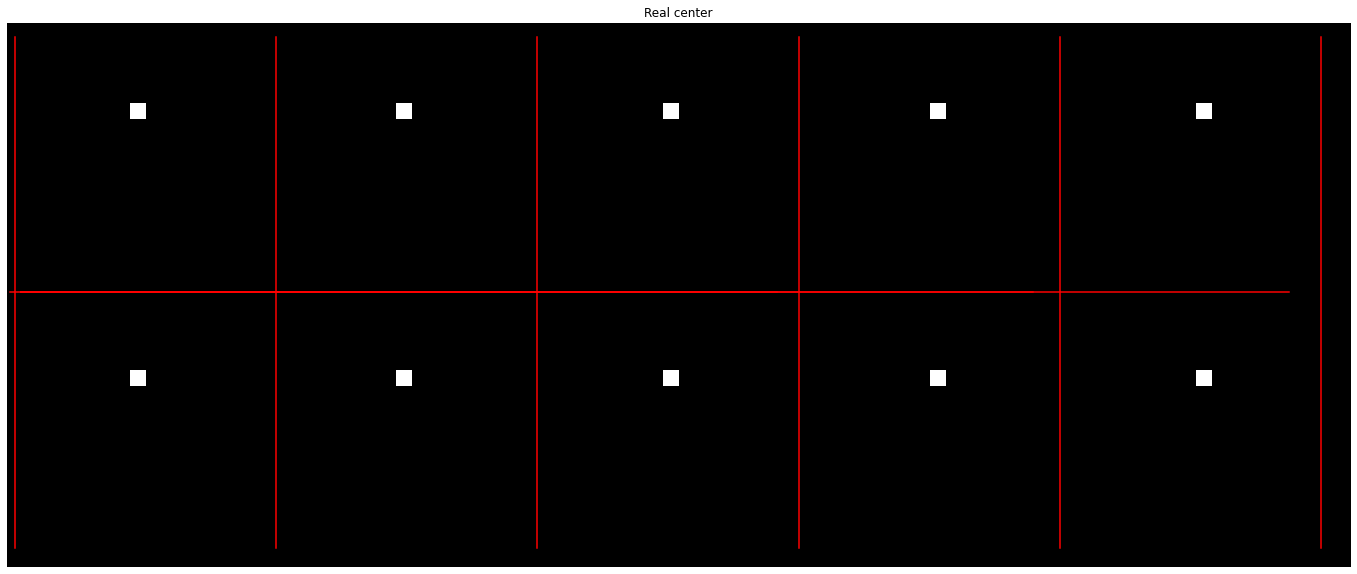

In [42]:
# Draw results
import torchvision.utils as utils 
def plot_pred_eye(sample_batched):
        grid = utils.make_grid(sample_batched,nrow = 5)
        grid = grid.to(torch.device("cpu"))
        plt.imshow((grid.numpy()).transpose((1,2, 0)))
        batch_size = 10
        
        for i in range(batch_size-1-3):
                
                plt.plot([i * 48 + (i + 1),i * 48 + (i + 1)],
                        [2,2+48*2], "r")
                
                plt.plot([2,48*i],
                        [2+48,2+48], "r")
        plt.axis('off')
        plt.ioff()




def plot_pred_center(eye_batched,sample_batched):
                
        batch_size = 10
        im_size = 48
        grid_border_size = 2

        grid = utils.make_grid(eye_batched,nrow=5)
        plt.imshow(grid.numpy().transpose((1, 2, 0)))

        grid2 = utils.make_grid(sample_batched,nrow = 5)
        grid2 = grid2.to(torch.device("cpu"))
        plt.imshow((grid2.numpy()).transpose((1,2, 0)),alpha = 0.4)

        for i in range(batch_size-4):
                plt.plot([i * 48 + (i + 1),i * 48 + (i + 1)],
                        [2,2+48*2], "r")
                
                plt.plot([2,48*i], [2+48,2+48], "r")

def plot_res(sample_batched,idx):
        landmarks_batch = \
                sample_batched[idx]
        batch_size = 10
        im_size = 48
        grid_border_size = 2

        grid = utils.make_grid(landmarks_batch,nrow=5)
        plt.imshow(grid.numpy().transpose((1, 2, 0)))

        for i in range(batch_size-4):
                plt.plot([i * 48 + (i + 1),i * 48 + (i + 1)],
                        [2,2+48*2], "r")
                
                plt.plot([2,48*i], [2+48,2+48], "r")
        
batch = next(iter(test_loader))
plt.figure(figsize = [100,10])
plot_pred_center(batch[0],res_1[0])
plt.axis('off')
plt.title("Predicted centers")
plt.ioff()
plt.show()

plt.figure(figsize = [100,10])
plot_pred_eye(res_1[0])
plt.axis('off')
plt.title("Predictions of center")
plt.ioff()
plt.show()


plt.figure(figsize = [100,10])
plot_pred_eye(res_e_1[0])
plt.axis('off')
plt.title("Predictions of eye")
plt.ioff()
plt.show()


plt.figure(figsize = [100,10])
plot_res(batch,1)
plt.title("Real center")
plt.axis('off')
plt.ioff()
plt.show()

